In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_set=pd.read_csv("TCS_stock.csv")
data_set.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0
5,2015-01-08,1221.199951,1224.500000,1210.275024,1221.900024,1070.343994,1565408.0
6,2015-01-09,1227.500000,1259.949951,1225.000000,1256.150024,1100.346191,3197642.0
7,2015-01-12,1258.500000,1264.000000,1240.125000,1254.849976,1099.207397,1596006.0
8,2015-01-13,1260.000000,1265.199951,1240.050049,1248.949951,1094.039185,1468432.0
9,2015-01-14,1258.000000,1265.900024,1250.250000,1260.974976,1104.572876,1787096.0


In [3]:
data_set.isna().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [4]:
data_set.dropna(inplace=True)

In [5]:
data_set.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03
mean,1826.027599,1845.240901,1805.624554,1825.226400,1733.238404,2.871305e+06
std,679.259927,686.315197,672.102864,678.990594,714.701808,2.752632e+06
min,1058.449951,1070.000000,1025.949951,1050.574951,955.857666,8.682200e+04
25%,1255.912476,1265.000000,1243.000000,1254.787536,1129.899963,1.738917e+06
50%,1725.000000,1750.000000,1702.000000,1725.625000,1619.241089,2.404448e+06
75%,2168.974976,2189.700074,2146.075074,2165.025024,2079.880738,3.328333e+06
max,3930.000000,3981.750000,3892.100098,3954.550049,3954.550049,8.806715e+07


In [6]:
data_set["Date"]=pd.to_datetime(data_set["Date"])

In [7]:
data_set.set_index("Date",inplace=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

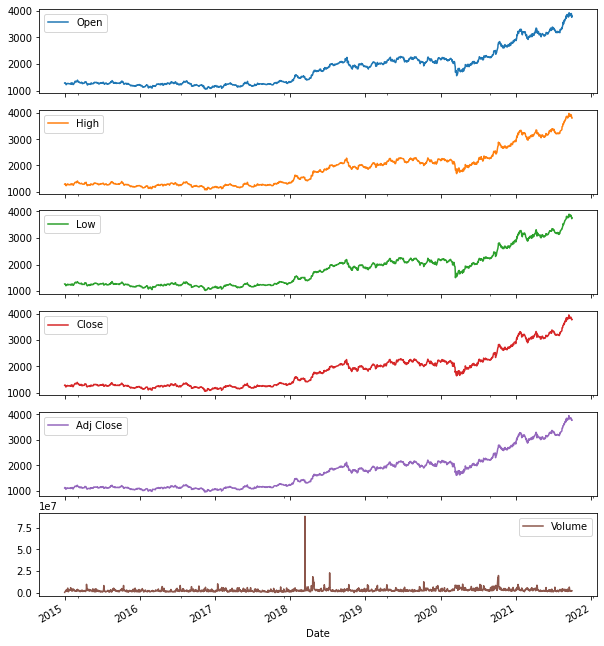

In [8]:
data_set.plot(subplots=True,figsize=(10,12))

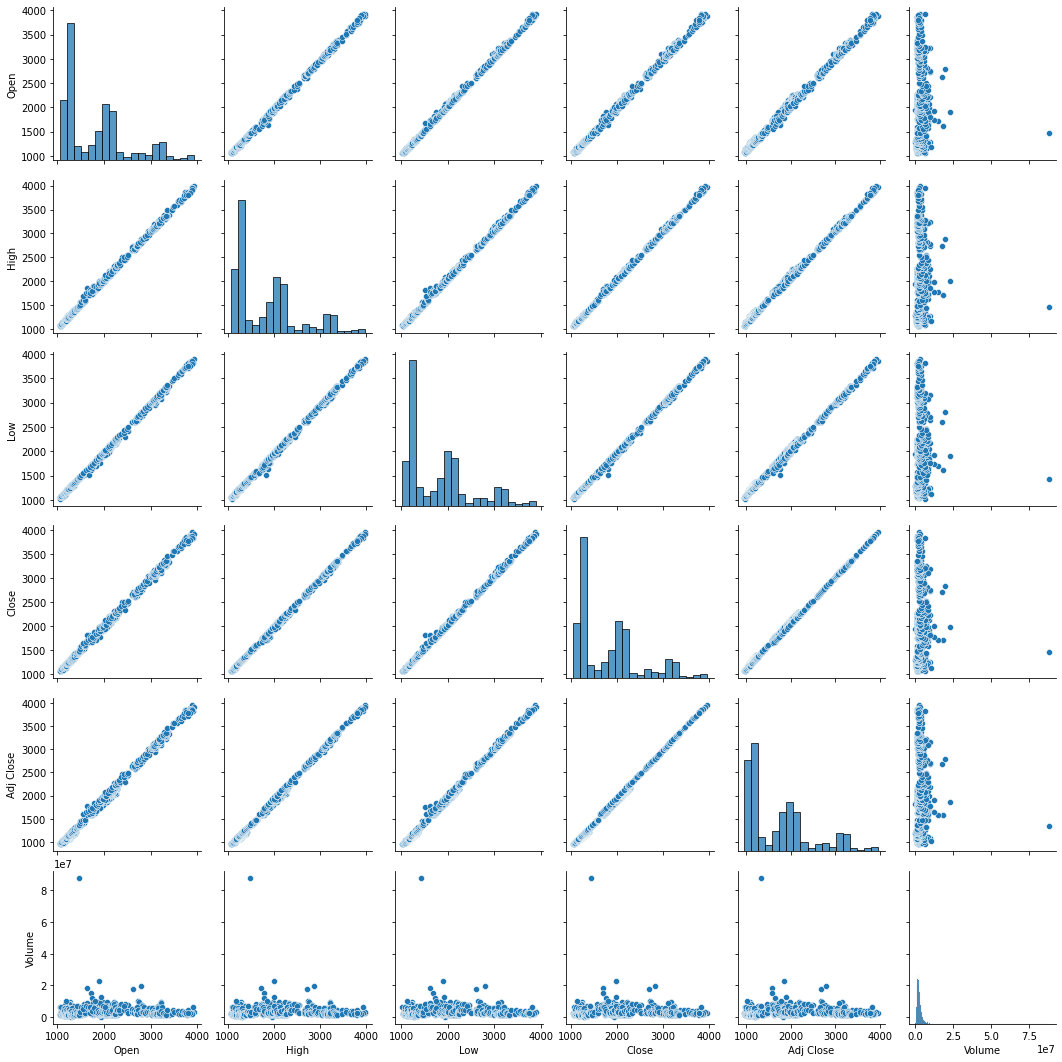

In [9]:
sns.pairplot(data_set)

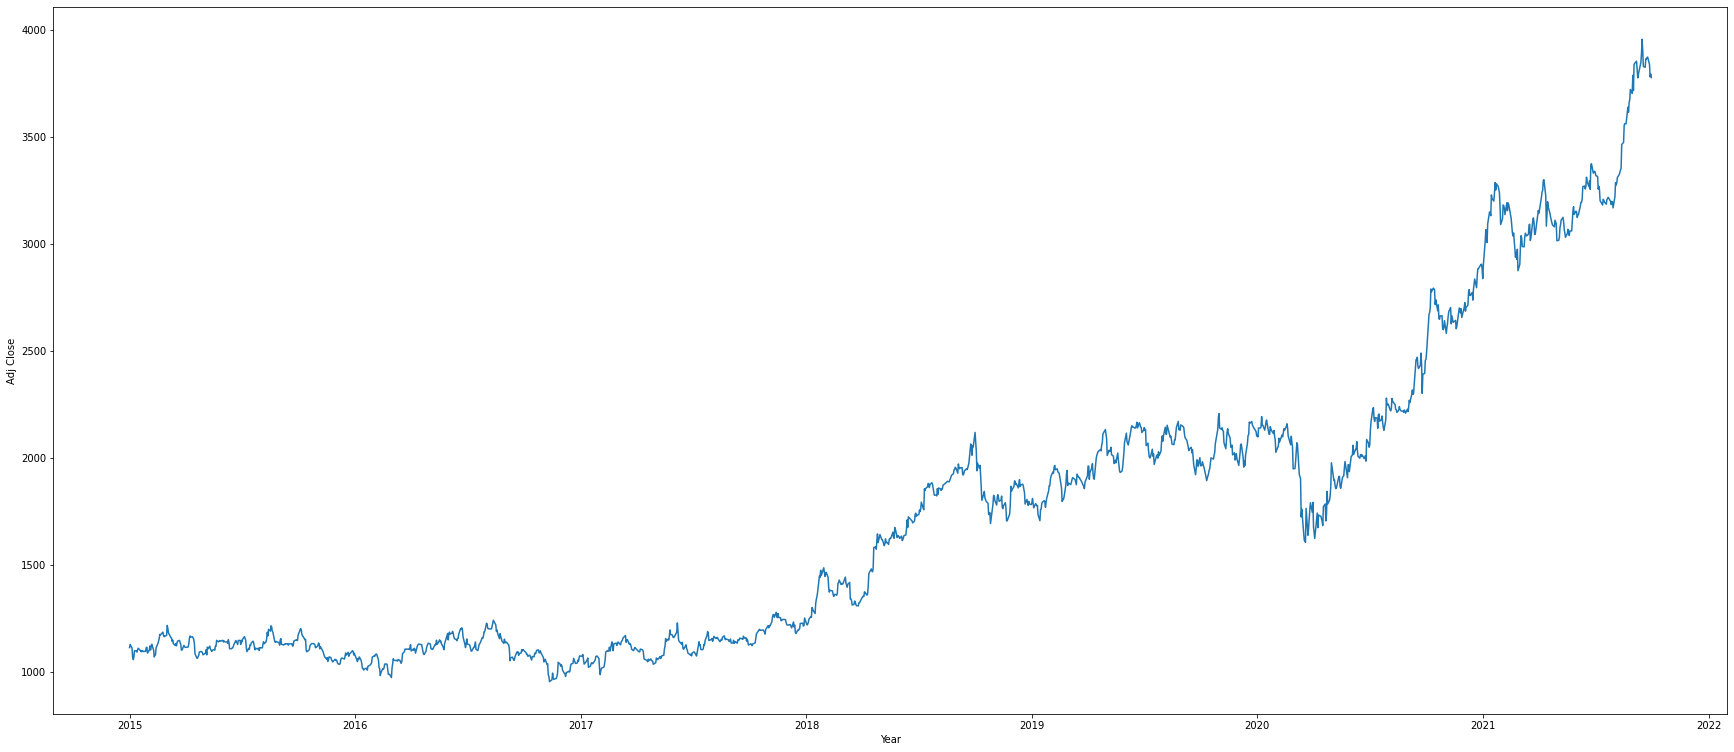

In [23]:
plt.figure(figsize=(30,13))
plt.xlabel("Year")
plt.ylabel("Adj Close")
plt.plot(data_set["Adj Close"])

In [11]:
x=data_set.loc[:,["Open","High","Low","Close","Volume"]].values
y=data_set["Adj Close"].values
y=y.reshape(len(y),1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

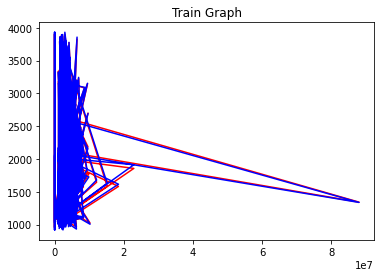

In [15]:
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(y_train),"r")
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(lin_reg.predict(x_train)),"b")
plt.title("Train Graph")
plt.show()

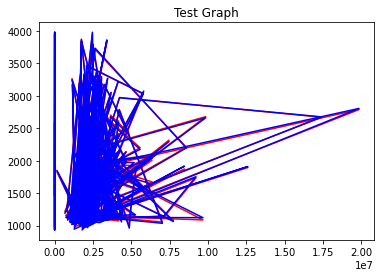

In [16]:
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),"r")
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(lin_reg.predict(x_test)),"b")
plt.title("Test Graph")
plt.show()

In [17]:
lin_reg.score(x_train,y_train)

0.9986297745513225

In [18]:
lin_reg.score(x_test,y_test)

0.9987250626205614

In [19]:
sc_y.inverse_transform(lin_reg.predict(sc_x.transform([[3870,3879,3835,3869.25,2003869]])))

array([[3869.73741516]])